In [1]:
import sklearn

In [2]:
from sklearn.tree import LinearDecisionTreeRegressor as ldtr
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
X,y = datasets.load_diabetes(return_X_y=True)
X = X[:, np.newaxis, 2]
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [11]:
X, y = make_regression(n_features=4)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [22]:
m = 150
#np.random.seed(42)
X = np.random.rand(m, 3) * 2
X= np.sort(X, axis= 0)
y = 4 * (X[:, 0] - 0.5) ** 2 + 6 * (X[:, 1] - 0.5)**2 + 2 * (X[:, 2] - 0.5)**5
y = y + np.random.randn(m,) / 10
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [23]:
X_train.shape

(120, 3)

In [24]:
reg1 = ldtr(max_depth = 2)
reg2 = LinearRegression(normalize = True,n_jobs = -1)
reg3 = LinearSVR()
reg4 = SVR(kernel = 'linear')
reg5 = DecisionTreeRegressor(max_depth = 2)

In [25]:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [26]:
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(X_test)
y_pred5 = reg5.predict(X_test)

In [27]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred1))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred2))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred3))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred4))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred5))

Mean squared error: 0.51
Mean squared error: 6.17
Mean squared error: 17.64
Mean squared error: 18.46
Mean squared error: 3.34


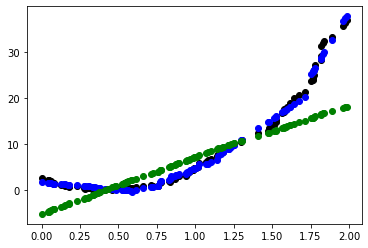

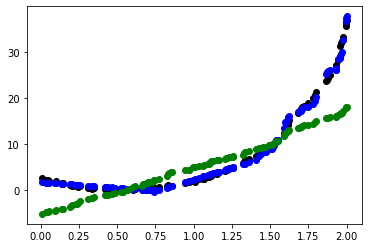

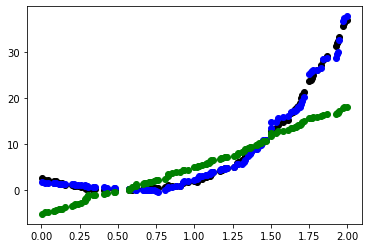

In [31]:
for i in range(X_train.shape[1]):
    plt.scatter(X_train[:, i], y_train,  color='black')
    plt.scatter(X_train[:, i], reg1.predict(X_train),  color='blue')
    plt.scatter(X_train[:, i], reg4.predict(X_train),  color='green')
    plt.show()

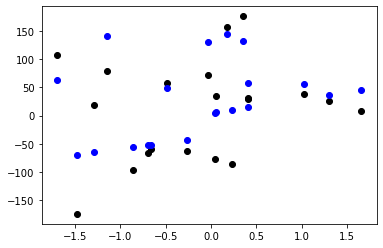

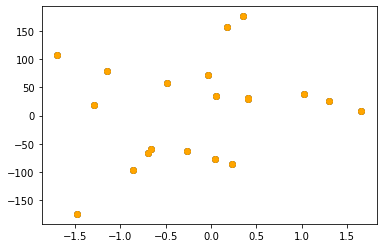

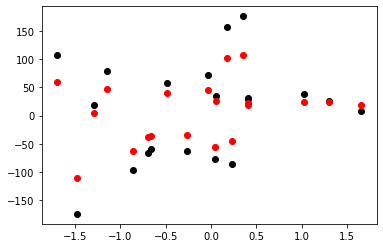

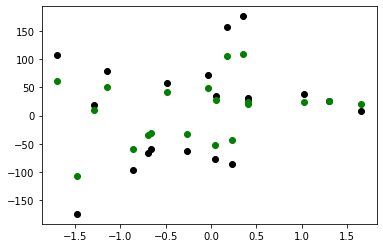

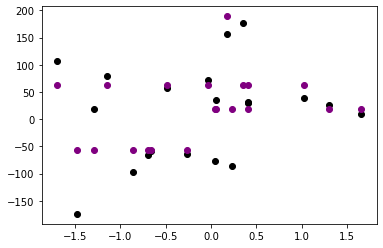

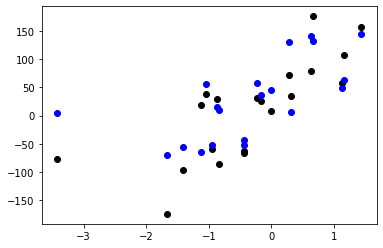

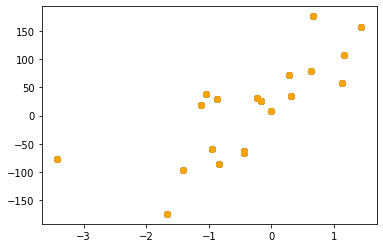

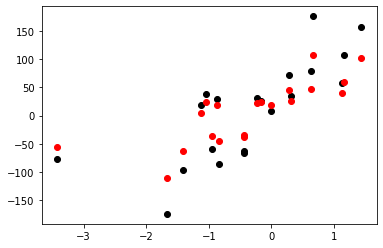

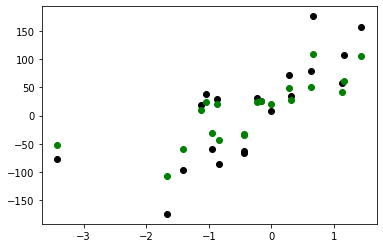

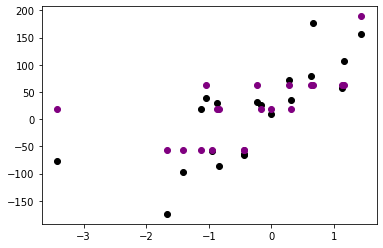

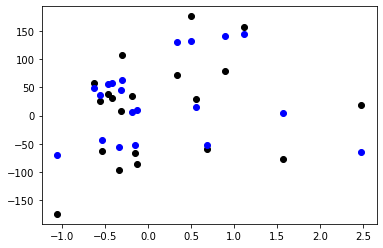

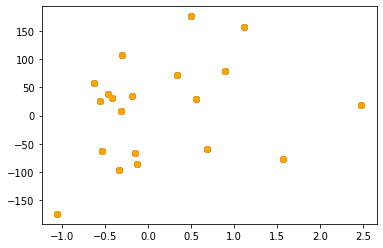

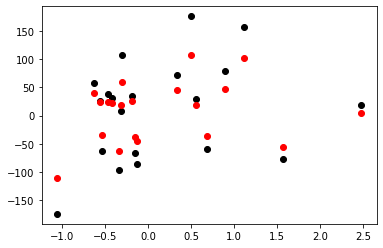

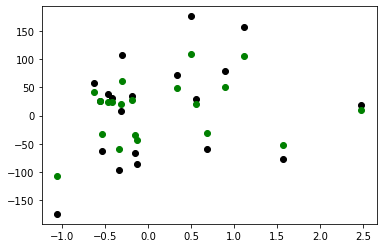

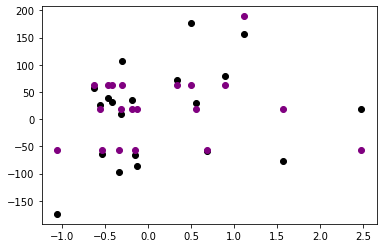

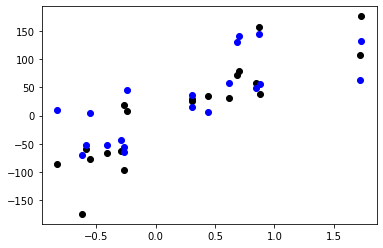

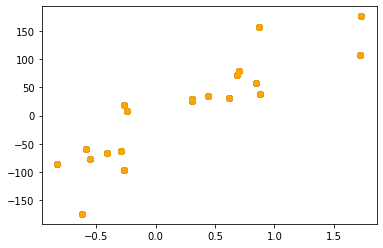

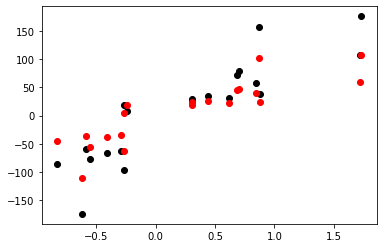

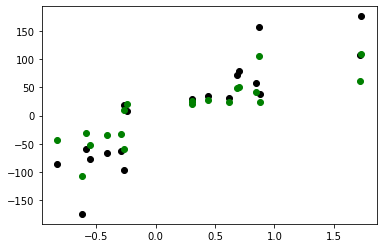

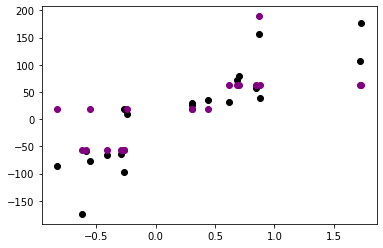

In [21]:
for i in range(X_test.shape[1]):
    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred1, color='blue')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i],y_pred2, color='orange')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i],y_pred3, color='red')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred4, color='green')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred5, color='purple')
    plt.show()